# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

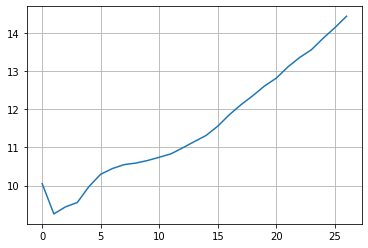

In [4]:
# Estos son los puntos originales

import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

m=len(data)
x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data)
plt.grid()


In [6]:
# Hacemos el ajuste con una linea recta

def fun_grado1(beta, X, y):
    beta=np.reshape(beta,[2, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])

X= np.hstack((unos,x1))
beta_inicial=np.random.rand(2)
y=np.reshape(data, [ m , -1 ])

solucion=opt.minimize(fun_grado1, beta_inicial, args=(X,y))
solucion

      fun: 2.3704889518155383
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([5.66244125e-07, 1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567637, 0.18667055])

In [7]:
# Hacemos el ajuste con una función cuadrática

def funcion(beta, X, y):
    
    beta=np.reshape(beta,[ 3 , -1 ])
    pred= X @ beta
    desv= (pred - y).T @ (pred - y)
    
    return desv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])

X=np.hstack((unos, x1, x2))

beta_inicial=np.random.rand(3)
y=np.reshape(data, [ m , -1 ])

solucion=opt.minimize(funcion, beta_inicial, args=(X,y))
solucion

      fun: 0.8443845193920632
 hess_inv: array([[ 1.44225511e-01, -2.17569793e-02,  6.84181738e-04],
       [-2.17569793e-02,  4.57454431e-03, -1.64203615e-04],
       [ 6.84181738e-04, -1.64203615e-04,  6.31552361e-06]])
      jac: array([6.85453415e-07, 1.04308128e-06, 7.59959221e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([9.59128652e+00, 7.25241171e-02, 4.39024752e-03])

In [8]:
# Ajuste con curva de grado 3

def funcion2(beta, X, y):
    
    beta=np.reshape(beta,[ 4 , -1 ])
    pred= X @ beta
    desv= (pred - y).T @ (pred - y)
    
    return desv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])
x3=np.reshape(x**3, [ m , -1 ])

X=np.hstack((unos, x1, x2, x3))

beta_inicial=np.random.rand(4)
y=np.reshape(data, [ m , -1 ])

solucion=opt.minimize(funcion2, beta_inicial, args=(X,y))
solucion

      fun: 0.8404346758506669
 hess_inv: array([[ 2.27239557e-01, -6.41154300e-02,  4.83488423e-03,
        -1.06428269e-04],
       [-6.41154300e-02,  2.61882156e-02, -2.28212618e-03,
         5.43057069e-05],
       [ 4.83488423e-03, -2.28212618e-03,  2.13850650e-04,
        -5.32141349e-06],
       [-1.06428269e-04,  5.43057069e-05, -5.32141349e-06,
         1.36446500e-07]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -2.98023224e-08, -1.34110451e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495831e-02, 3.20207444e-03, 3.04659687e-05])

(9.0, 15.0)

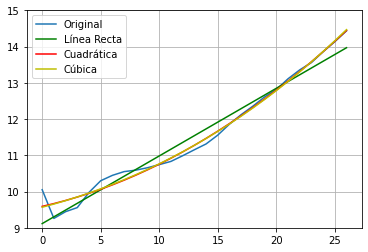

In [5]:
# Graficamos las tres curvas y comparamos con los puntos orginales

x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data, label="Original")
plt.plot(x, 9.11567637+(0.18667055*x), 'g', label="Línea Recta") # Función de grado 1
plt.plot(x, 9.59128645+(0.0725241171*x)+(0.004390247527*(x**2)), "r", label="Cuadrática") # Función de grado 2
plt.plot(x, 9.56752299+(0.0846495831*x)+(0.00320207444*(x**2))+(0.0000304659687*(x**3)), "y", label="Cúbica") # Función de grado 3
plt.grid()
plt.legend(loc="best")
plt.ylim([9,15])

      fun: 0.8404346758227135
 hess_inv: array([[ 2.27239836e-01, -6.41155369e-02,  4.83488763e-03,
        -1.06428232e-04],
       [-6.41155369e-02,  2.61881573e-02, -2.28211717e-03,
         5.43054418e-05],
       [ 4.83488763e-03, -2.28211717e-03,  2.13847628e-04,
        -5.32129922e-06],
       [-1.06428232e-04,  5.43054418e-05, -5.32129922e-06,
         1.36442005e-07]])
      jac: array([0.00000000e+00, 1.49011612e-08, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 10
     njev: 21
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495840e-02, 3.20207436e-03, 3.04659703e-05])

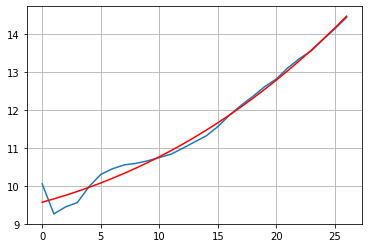

In [17]:
x=np.linspace(0,26,m)

plt.figure()
plt.plot(x,data)
plt.plot(x, 9.56752299+(0.0846495840*x)+(0.00320207436*(x**2)+(0.0000304659703*(x**3))), "r")
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

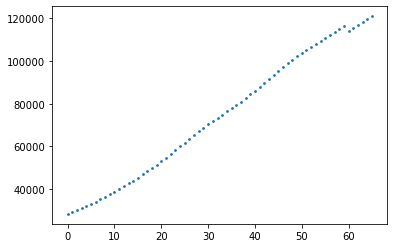

In [8]:
import pandas as pd

datos=pd.read_excel("population_data.xlsx")
poblacion=datos['Poblacion'].to_numpy()
m=len(poblacion)
x=np.linspace(0,m-1,m)

plt.figure()
plt.scatter(x,poblacion, s=3)

# Datos históricos de la población en México

In [40]:
# Ajuste con modelo de grado uno
def pob1(beta, X, y):
    
    beta=np.reshape(beta,[2, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])

X= np.hstack((unos,x1))
beta_inicial=np.random.rand(2)
y=np.reshape(poblacion, [ m , -1 ])

solucion=opt.minimize(pob1, beta_inicial, args=(X,y))
solucion

      fun: 212137169.55306005
 hess_inv: array([[1.09433436e-07, 1.74090019e-08],
       [1.74090019e-08, 5.82000467e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 11
     njev: 30
   status: 0
  success: True
        x: array([24138.03863617,  1543.97287783])

In [33]:
# Ajuste con modelo de grado dos
def pob2(beta, X, y):
    
    beta=np.reshape(beta,[3, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])

X= np.hstack((unos,x1,x2))
beta_inicial=np.random.rand(3)
y=np.reshape(poblacion, [ m , -1 ])

solucion=opt.minimize(pob2, beta_inicial, args=(X,y))
solucion

      fun: 210941621.44899744
 hess_inv: array([[ 8.95305648e-02, -5.38900082e-03,  6.80655874e-05],
       [-5.38900082e-03,  4.09776224e-04, -5.72724945e-06],
       [ 6.80655874e-05, -5.72724945e-06,  8.49411121e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([2.44255707e+04, 1.51701448e+03, 4.14756049e-01])

In [39]:
# Ajuste con modelo de grado tres
def pob3(beta, X, y):
    
    beta=np.reshape(beta,[4, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([m, 1])
x1=np.reshape(x, [ m , -1 ])
x2=np.reshape(x**2, [ m , -1 ])
x3=np.reshape(x**3, [ m , -1 ])

X= np.hstack((unos,x1,x2,x3))
beta_inicial=np.random.rand(4)
y=np.reshape(poblacion, [ m , -1 ])

solucion=opt.minimize(pob3, beta_inicial, args=(X,y))
solucion

      fun: 25240442.641446788
 hess_inv: array([[ 5.01190027e-02,  1.33233508e-06,  6.67411727e-07,
        -6.29321163e-07],
       [ 1.33233508e-06,  5.85965998e-11,  2.88435526e-11,
        -2.03905687e-11],
       [ 6.67411727e-07,  2.88435526e-11,  1.44430926e-11,
        -1.02139361e-11],
       [-6.29321163e-07, -2.03905687e-11, -1.02139361e-11,
         9.55793342e-12]])
      jac: array([ 0.  ,  0.  ,  0.75, 21.25])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 14
     njev: 67
   status: 2
  success: False
        x: array([ 2.84777619e+04,  7.39078513e+02,  3.05648927e+01, -3.09232056e-01])

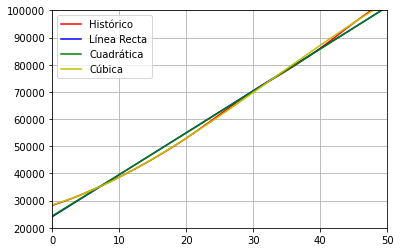

In [53]:
# Graficando las curvas y comparando con los datos reales:

plt.figure()
plt.plot(x,poblacion,'r',label="Histórico")
plt.plot(x,24138.03863617+(1543.97287783*x),'b',label="Línea Recta")
plt.plot(x,24425.5707+(1517.01448*x)+(0.414756049*(x**2)),'g',label="Cuadrática")
plt.plot(x,28477.7619+(739.078513*x)+(30.5648927*(x**2))-(0.309232056*(x**3)),'y',label="Cúbica")
plt.grid()
plt.ylim([20000,100000])
plt.xlim([0,50])
plt.legend(loc="best")

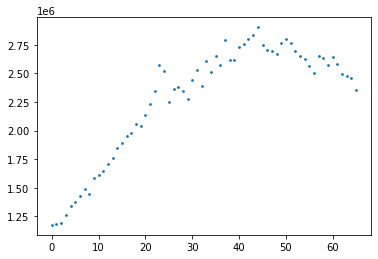

In [21]:
# Para el modelo de los nacimientos
nacimientos=datos['Nacimientos'].to_numpy()
n=len(nacimientos)
x2=np.linspace(0,n-1,n)

plt.figure()
plt.scatter(x,nacimientos, s=3)

In [15]:
# Haciendo el ajusto con una función de grado 1
def nac1(beta, X, y):
    
    beta=np.reshape(beta,[2, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([n, 1])
x1=np.reshape(x2, [ n, -1 ])

X= np.hstack((unos,x1))
beta_inicial=np.random.rand(2)
y=np.reshape(nacimientos, [ n , -1 ])

solucion=opt.minimize(nac1, beta_inicial, args=(X,y))
solucion

      fun: 4737914384162.634
 hess_inv: array([[ 7.50828887e-03, -1.64768109e-04],
       [-1.64768109e-04,  8.70684502e-06]])
      jac: array([     0., 327680.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 213
      nit: 8
     njev: 67
   status: 2
  success: False
        x: array([1563323.49236654,   21970.47767904])

In [16]:
# Con una función de grado 2
def nac2(beta, X, y):
    
    beta=np.reshape(beta,[3, -1])
    pred= X @ beta
    dsv= (pred-y).T @ (pred-y)
    
    return dsv[0][0]

unos=np.ones([n, 1])
x1=np.reshape(x2, [ n, -1 ])
x2=np.reshape(x2**2, [ n, -1 ])

X= np.hstack((unos,x1,x2))
beta_inicial=np.random.rand(3)
y=np.reshape(nacimientos, [ n , -1 ])

solucion=opt.minimize(nac2, beta_inicial, args=(X,y))
solucion

      fun: 492921144198.5442
 hess_inv: array([[ 3.24082205e-08, -1.59840800e-06,  3.23915370e-08],
       [-1.59840800e-06,  8.40692434e-05, -1.59840698e-06],
       [ 3.23915370e-08, -1.59840698e-06,  3.23915240e-08]])
      jac: array([      0.,   -4096., -147456.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 280
      nit: 8
     njev: 68
   status: 2
  success: False
        x: array([ 1.02121875e+06,  7.27710389e+04, -7.81473962e+02])

In [26]:
# Con una función de grado 3
def nac3(beta, X, y):
    
    beta=np.reshape(beta,[4, -1])
    pred= X @ beta
    dsv= (y-pred).T @ (y-pred)
    
    return dsv[0][0]

x2=np.linspace(0,n-1,n)
unos=np.ones([n, 1])
x1=np.reshape(x2, [ n, -1 ])
x2=np.reshape(x2**2, [ n, -1 ])
x3=np.reshape(x2**3, [ n, -1 ])

X= np.hstack((unos,x1,x2,x3))
beta_inicial=np.random.rand(4)
y=np.reshape(nacimientos, [ n , -1 ])

solucion=opt.minimize(nac3, beta_inicial, args=(X,y))
solucion

      fun: 457401527707.41077
 hess_inv: array([[ 3.86647495e-04, -3.86647494e-04,  1.01960583e-05,
        -2.76900791e-13],
       [-3.86647494e-04,  3.86647493e-04, -1.01960582e-05,
         2.76900790e-13],
       [ 1.01960583e-05, -1.01960582e-05,  2.79429350e-07,
        -8.12549246e-15],
       [-2.76900791e-13,  2.76900790e-13, -8.12549246e-15,
         2.79132260e-22]])
      jac: array([ 8.19200000e+03,  8.19200000e+03, -1.63266560e+07, -2.08975537e+14])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 220
      nit: 15
     njev: 44
   status: 2
  success: False
        x: array([ 1.05978406e+06,  6.68529733e+04, -6.37839179e+02, -4.47170554e-06])

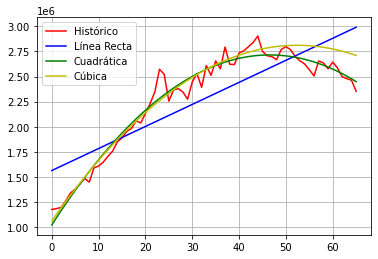

In [27]:
# Graficando las curvas y comparando con los datos históricos, para nacimientos:

plt.figure()
plt.plot(x,nacimientos,'r',label="Histórico")
plt.plot(x,1563016.33039242+(21976.11127997*x),'b',label="Línea Recta")
plt.plot(x,1021083.81+(72779.5866*x)-(781.584907*(x**2)),'g',label="Cuadrática")
plt.plot(x,1.05978406e+06+(6.68529733e+04*x)+(-6.37839179e+02*(x**2))+(-4.47170554e-06*(x**3)),'y',label="Cúbica")
plt.grid()
plt.legend(loc='best')